# 1. Метод k ближайших соседей

In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets, neighbors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [14]:
data = datasets.make_classification(200, n_features = 2, n_informative = 2, n_classes = 4, 
                                                      n_redundant = 0, n_clusters_per_class = 1)

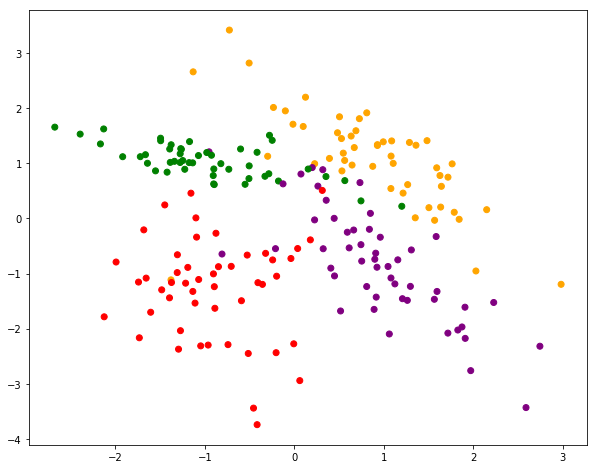

In [15]:
colors = ListedColormap(['red', 'green', 'purple', 'orange'])
light_colors = ListedColormap(['lightcoral', 'lightgreen', 'lightpink', 'lightyellow'])
points = np.transpose(data[0])
plt.figure(figsize=(10, 8))
plt.scatter(points[0], points[1], c = data[1], cmap = colors)
plt.show()

In [16]:
def plot_decision_surface(neighbor, train_data, train_labels, 
                          colors = colors, light_colors = light_colors):
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=neighbor[0])
    clf.fit(train_data, train_labels)
    
    plt.figure(figsize = (10, 5))
    
    plt.subplot(121)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title("k="+str(neighbor[0]))
    
    clf = neighbors.KNeighborsClassifier(n_neighbors=neighbor[1])
    clf.fit(train_data, train_labels)
    
    plt.subplot(122)
    xx, yy = get_meshgrid(train_data)
    mesh_predictions = np.array(clf.predict(np.c_[xx.ravel(), yy.ravel()])).reshape(xx.shape)
    plt.pcolormesh(xx, yy, mesh_predictions, cmap = light_colors)
    plt.scatter(train_data[:, 0], train_data[:, 1], c = train_labels, s = 100, cmap = colors)
    plt.title("k="+str(neighbor[1]))

In [17]:
def get_meshgrid(data, step=.05, border=.5,):
    x_min, x_max = data[:, 0].min() - border, data[:, 0].max() + border
    y_min, y_max = data[:, 1].min() - border, data[:, 1].max() + border
    return np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))

In [18]:
train_data, train_labels = data[0], data[1]
num_neigh = [[1, 3], [5, 7], [11, 15], [31, 51], [80, 99]]

Разделяющие поверхности

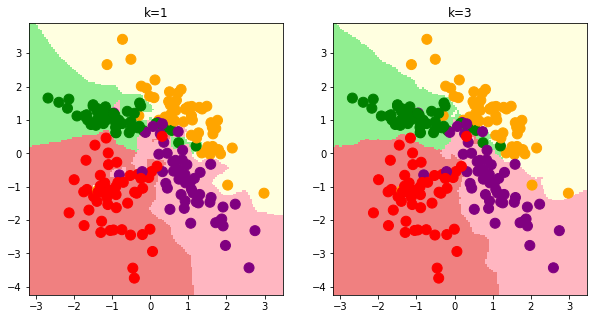

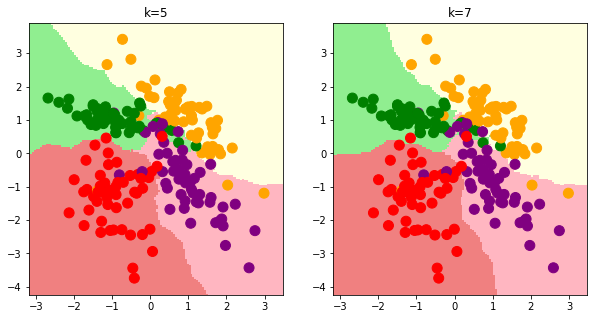

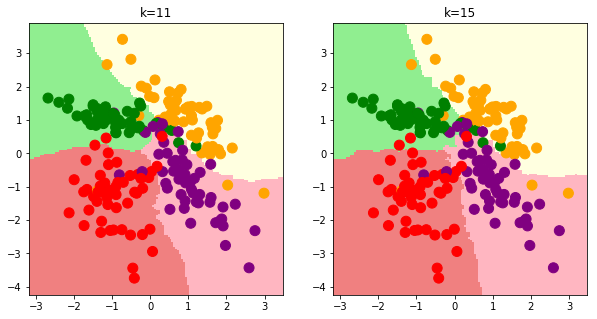

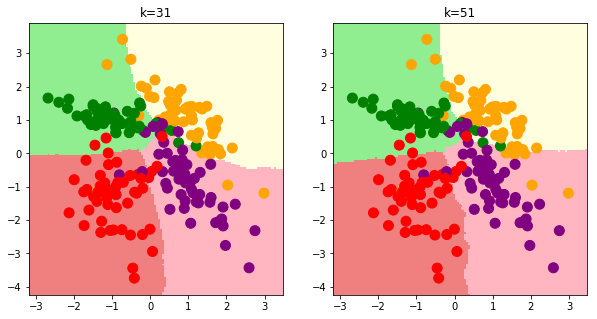

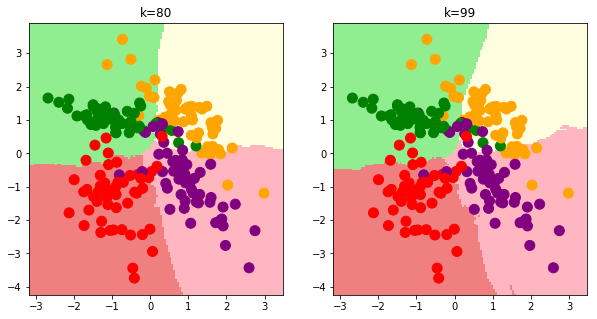

In [19]:
for i in num_neigh:
    plot_decision_surface(i, train_data, train_labels)

In [20]:
grid = np.arange(1, 30)
err = []

for i in grid:
    clf = neighbors.KNeighborsClassifier(n_neighbors=i)
    err.append(cross_val_score(clf, data[0], data[1], cv=5, scoring='accuracy').mean())

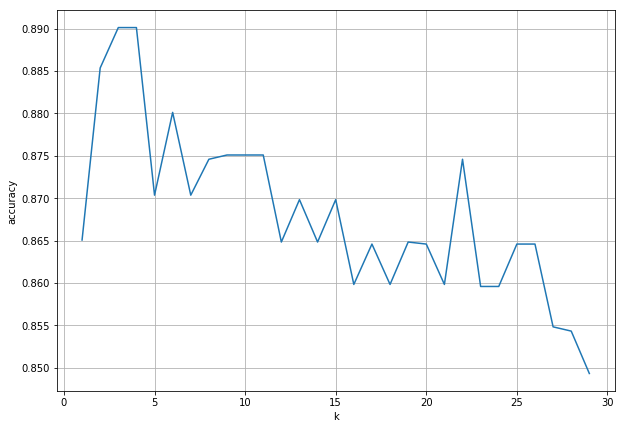

In [22]:
plt.figure(figsize=(10, 7))
plt.plot(grid, err)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.grid()
plt.show()

Таким образом, оптимальное значение k - 3 или 4

# 2. Наивный байесовский классификатор

In [24]:
from sklearn import naive_bayes

In [25]:
digits = datasets.load_digits()
breast = datasets.load_breast_cancer()

In [26]:
breast_frame = pd.DataFrame(breast.data)
breast_frame.columns = breast.feature_names
breast_frame['target'] = breast.target
breast_frame.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


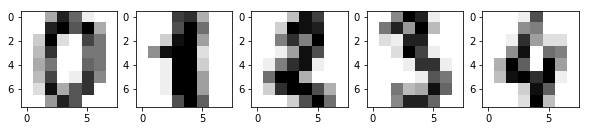

In [27]:
plt.figure(1, figsize=(10, 2))
for i in np.arange(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(digits.images[i], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [28]:
digits_frame = pd.DataFrame(digits.data)
digits_frame['target'] = digits.target
digits_frame.target = digits_frame.target.apply(lambda x : digits.target_names[x])
digits_frame.head()

,0,1,2,3,4,5,6,7,8,9,...,55,56,57,58,59,60,61,62,63,target
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4


In [31]:
bnb = naive_bayes.BernoulliNB()
mnb = naive_bayes.MultinomialNB()
gnb = naive_bayes.GaussianNB()

def get_score(clf):
    score_dig = cross_val_score(clf, digits.data, digits.target)
    score_br = cross_val_score(clf, breast.data, breast.target)
    print("Digits: ", score_dig.mean())
    print("Breast: ", score_br.mean())

In [33]:
print("BernoulliNB")
get_score(bnb)

print("MultinomialNB")
get_score(mnb)

print("GaussianNB")
get_score(gnb)

BernoulliNB
Digits:  0.825823650778
Breast:  0.627420402859
MultinomialNB
Digits:  0.870877148974
Breast:  0.894579040193
GaussianNB
Digits:  0.818600380355
Breast:  0.936749280609


1. Максимальное качество классификации на датасете breast_cancer - 0,94 при использовании GaussianNB
2. Максимальное качество классификации на датасете digits - 0,87 при использовании MultinomialNB
3. c, d

# 3. Метрики в задаче регрессии

In [55]:
import scipy.optimize as opt
import scipy.stats as sps

x = sps.uniform.rvs(-1, 10, size=500)
y = x * 0.5 + np.ones_like(x) + sps.norm.rvs(scale=0.2, size=500) 

#### 1. Визуализация выборки

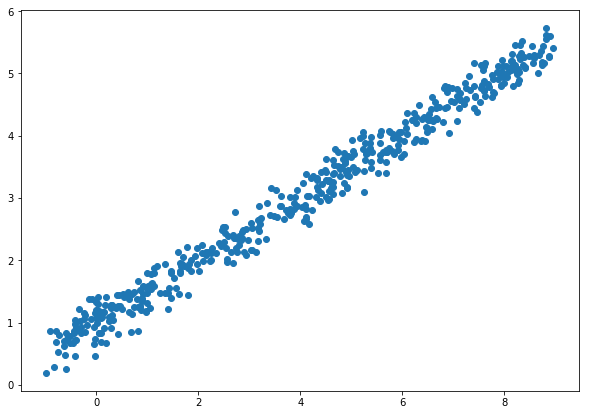

In [56]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.show()

 #### 2. Восстановление линейной зависимости

In [57]:
def mse(k):
    err = (y - k[0]*x - k[1]*np.ones_like(x)) ** 2
    return (err.mean())

In [58]:
min_mse = opt.minimize(mse, [0., 0.])
k, b = min_mse.x[0], min_mse.x[1]

In [59]:
min_mse

      fun: 0.039721347232742746
 hess_inv: array([[ 0.05907159, -0.23764742],
       [-0.23764742,  1.45586103]])
      jac: array([ -4.19095159e-09,   3.25962901e-09])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([ 0.50128599,  1.00022847])

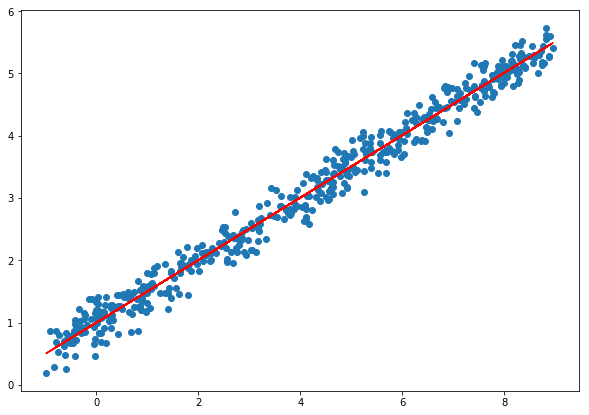

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y)
plt.plot(x, k*x + b*np.ones_like(x), color='red')
plt.show()

#### 3. Добавление выбросов

In [61]:
x = np.append(x, sps.uniform.rvs(-1, 10, size=75))
y = np.append(y, -1 + sps.norm.rvs(scale=0.2, size=75) )

In [62]:
def mae(k):
    err = abs(y - k[0]*x - k[1]*np.ones_like(x))
    return (err.mean())

In [63]:
new_min_mse = opt.minimize(mse, [0., 0.])
k1, b1 = new_min_mse.x[0], new_min_mse.x[1]

In [64]:
new_min_mae = opt.minimize(mae, [0., 0.])
k2, b2 = new_min_mae.x[0], new_min_mae.x[1]

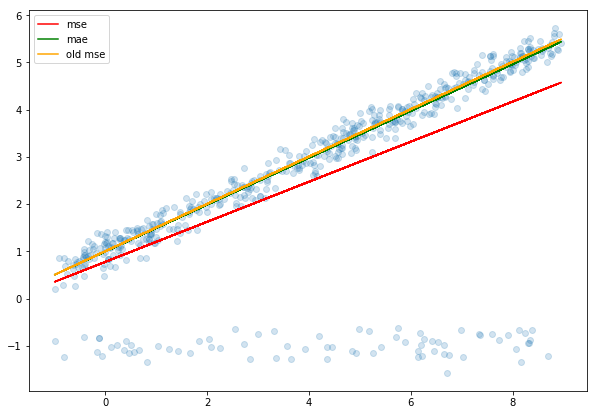

In [65]:
plt.figure(figsize=(10, 7))
plt.scatter(x, y, alpha=.2)
plt.plot(x, k1*x + b1*np.ones_like(x), color='red', label='mse')
plt.plot(x, k2*x + b2*np.ones_like(x), color='green', label='mae')
plt.plot(x, k*x + b*np.ones_like(x), color='orange', label='old mse')
plt.legend()
plt.show()

In [49]:
print("Old mse:", k, b)
print("mse:", k1, b1)
print("mae:", k2, b2)

Old mse: 0.500566240467 0.99180034524
mse: 0.546495205186 0.560151676816
mae: 0.508661327812 0.93798144995


#### 4. Полученные результаты говорят о том, что модель, оптимизирующая MAE более устойчива к выбросам